In [86]:
# Import libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
import warnings 
warnings.filterwarnings('ignore')

In [87]:
# Run this cell for more readable visuals 

large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-white')
plt.rcParams.update(params)
#sns.set_style("white")
%matplotlib inline

In [88]:
# Read the file "bacteria_train.csv" as a dataframe
# The file is the same as your homework 2

df = pd.read_csv("bacteria_train.csv")

In [89]:
# Take a quick look of your dataset

df.head()

,Perc_population,Spreading_factor
0,1.535,0.190708
1,5.555,0.326928
2,-0.277,-0.459699
3,1.724,-0.193013
4,-0.550,-0.835745


In [90]:
# Store the predictor ('Spreading_factor') and the response ('Perc_population') values as the variables 'x' and 'y'

x, y  = df[['Perc_population']], df['Spreading_factor']

In [91]:
# Select the number of polynomial features as per the maximum degree

maxdeg = 4
x_poly = PolynomialFeatures(maxdeg).fit_transform(x)

In [93]:
# Select a list of alpha values ranging from 10 to 120 with 1000 points between them

alpha_list = np.linspace(10,120,1000)
len(alpha_list)
alpha_list

array([ 10.        ,  10.11011011,  10.22022022,  10.33033033,
        10.44044044,  10.55055055,  10.66066066,  10.77077077,
        10.88088088,  10.99099099,  11.1011011 ,  11.21121121,
        11.32132132,  11.43143143,  11.54154154,  11.65165165,
        11.76176176,  11.87187187,  11.98198198,  12.09209209,
        12.2022022 ,  12.31231231,  12.42242242,  12.53253253,
        12.64264264,  12.75275275,  12.86286286,  12.97297297,
        13.08308308,  13.19319319,  13.3033033 ,  13.41341341,
        13.52352352,  13.63363363,  13.74374374,  13.85385385,
        13.96396396,  14.07407407,  14.18418418,  14.29429429,
        14.4044044 ,  14.51451451,  14.62462462,  14.73473473,
        14.84484484,  14.95495495,  15.06506507,  15.17517518,
        15.28528529,  15.3953954 ,  15.50550551,  15.61561562,
        15.72572573,  15.83583584,  15.94594595,  16.05605606,
        16.16616617,  16.27627628,  16.38638639,  16.4964965 ,
        16.60660661,  16.71671672,  16.82682683,  16.93

In [94]:
### edTest(test_ridge_fit) ###

### edTest(test_ridge_fit) ###
# Make an empty list called coeff_list and for each alpha value, compute the coefficients and add it to coeff_list
coeff_list = []


#Now, you will implement the ridge regularisation for each alpha value, make sure you set Normalize=True

for i in alpha_list:

    ridge_reg = Ridge(alpha=i,normalize=True)

    #Fit on the entire data because we just want to see the trend of the coefficients

    ridge_reg.fit(x_poly, y)
    
    # Append the coeff_list with the coefficients of the model
    
    coeff_list.append(ridge_reg.coef_)


In [95]:
# We take the transpose of the list to get the variation in the coefficient values per degree

trend = np.array(coeff_list).T

Text(0.5, 0.98, 'Ridge ($L_2$) Regression')

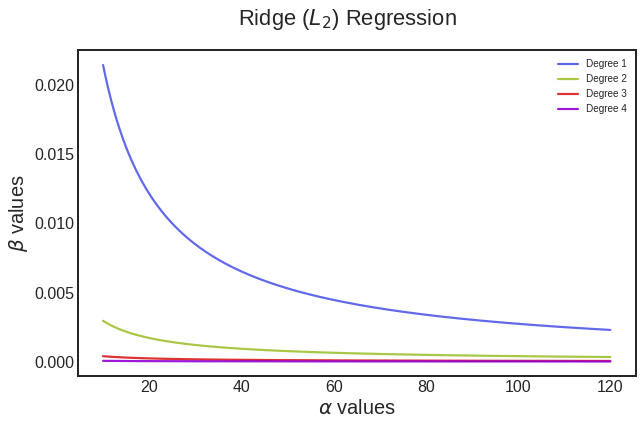

In [96]:
# Use the code below to plot the variation of the coefficients as per the alpha value

# Just adding some nice colors. make sure to comment this cell out if you plan to use degree more than 7
colors = ['#5059E8','#9FC131FF','#D91C1C','#9400D3','#FF2F92','#336600','black']

fig, ax = plt.subplots(figsize = (10,6))
for i in range(maxdeg):
    ax.plot(alpha_list,np.abs(trend[i+1]),color=colors[i],alpha = 0.9,label = f'Degree {i+1}',lw=2.2)
    ax.legend(loc='best',fontsize=10)
    ax.set_xlabel(r'$\alpha$ values', fontsize=20)
    ax.set_ylabel(r'$\beta$ values', fontsize=20)

fig.suptitle(r'Ridge ($L_2$) Regression');

### Compare the results of Ridge regression with the Lasso variant

In [98]:
# Select a list of alpha values ranging from 1e-4 to 1e-1 with 1000 points between them

alpha_list = np.linspace(1e-4,1e-1,1000)
len(alpha_list)
alpha_list

array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024,
       0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032,
       0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004 ,
       0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0048,
       0.0049, 0.005 , 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056,
       0.0057, 0.0058, 0.0059, 0.006 , 0.0061, 0.0062, 0.0063, 0.0064,
       0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071, 0.0072,
       0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008 ,
       0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088,
       0.0089, 0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096,
       0.0097, 0.0098, 0.0099, 0.01  , 0.0101, 0.0102, 0.0103, 0.0104,
       0.0105, 0.0106, 0.0107, 0.0108, 0.0109, 0.011 , 0.0111, 0.0112,
      

In [99]:
### edTest(test_lasso_fit) ###
# Make an empty list called coeff_list and for each alpha value, compute the coefficients and add it to coeff_list
coeff_list = []


#Now, you will implement the ridge regularisation for each alpha value, again normalize

for i in alpha_list:

    lasso_reg = Lasso(alpha=i,max_iter=250000,normalize=True)

    #Fit on the entire data because we just want to see the trend of the coefficients
    
    lasso_reg.fit(x_poly, y)
    
    # Again append the coeff_list with the coefficients of the model
    
    coeff_list.append(lasso_reg.coef_)


In [100]:
# We take the transpose of the list to get the variation in the coefficient values per degree

trend = np.array(coeff_list).T

Text(0.5, 0.98, 'Lasso ($L_1$) Regression')

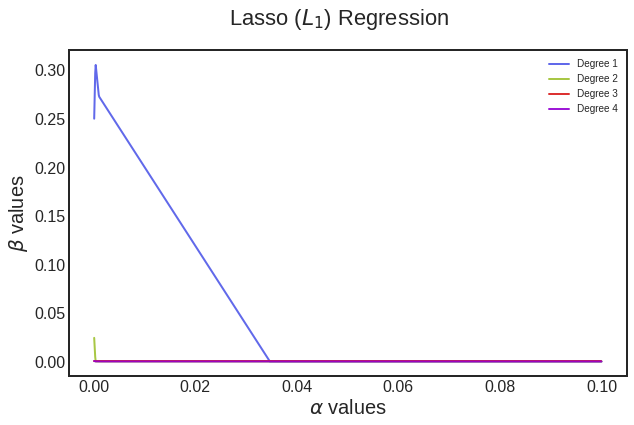

In [101]:
# Use helper code below to plot the variation of the coefficients as per the alpha value

colors = ['#5059E8','#9FC131FF','#D91C1C','#9400D3','#FF2F92','#336600','black']

fig, ax = plt.subplots(figsize = (10,6))
for i in range(maxdeg):
    ax.plot(alpha_list,np.abs(trend[i+1]),color=colors[i],alpha = 0.9,label = f'Degree {i+1}',lw=2)
    ax.legend(loc='best',fontsize=10)
    ax.set_xlabel(r'$\alpha$ values', fontsize=20)
    ax.set_ylabel(r'$\beta$ values', fontsize=20)

fig.suptitle(r'Lasso ($L_1$) Regression');

## Mindchow 🍲
After marking the exercise, go back and change your maximum degree, and see how your coefficients vary for higher degrees

> Remember to hide your `colors` variable to avoid `index error` while plotting coefficients

Your answer here